Step 1: Read the wine quality dataset.

Step2: Group it on the basis of the target column.

Step3: Drop the target column.

Step4: Scale the data.

Step5: Apply K-means on the dataset.

Step6: Print the tabular column to get the number of cluster with cluster error.

Step7: Get the elbow curve and inference from it.

Step8: Convert your labels to categorical and apply it attach it to your dataframe.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")


In [32]:
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df,category],axis=1)
df.drop(columns="quality",axis=1,inplace=True)

In [33]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


In [34]:
le = LabelEncoder()
df.category = le.fit_transform(df.category)

In [35]:
X = df.drop('category',1)
y = df.category

In [36]:

scale = StandardScaler()
z = scale.fit_transform(X)
z

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [37]:
x = pd.DataFrame(z, columns=X.columns)


In [38]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,1.914080e+06
1,2,6.919099e+05
2,3,3.953092e+05
3,4,2.831585e+05
4,5,2.211577e+05
5,6,1.773296e+05
6,7,1.498259e+05
7,8,1.330143e+05
8,9,1.164993e+05
9,10,1.017055e+05


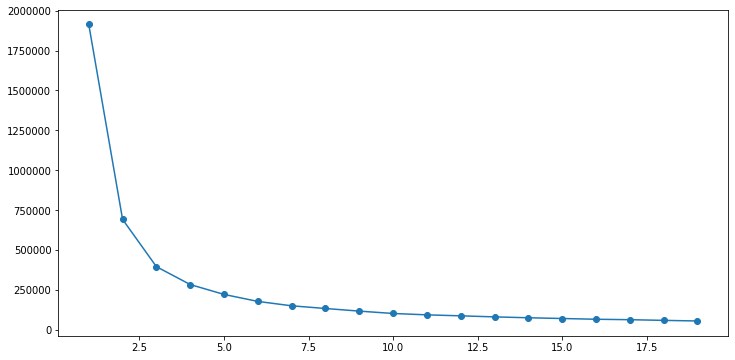

In [39]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [40]:


kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

centroids: 
 [[8.23236607e+00 5.26808036e-01 2.41830357e-01 2.39598214e+00
  8.64441964e-02 1.54743304e+01 3.89553571e+01 9.96687121e-01
  3.32897321e+00 6.47700893e-01 1.04436384e+01]
 [7.82659574e+00 5.78297872e-01 2.60265957e-01 3.09680851e+00
  8.83510638e-02 2.31117021e+01 9.36702128e+01 9.96857872e-01
  3.31351064e+00 6.37074468e-01 1.01034574e+01]
 [8.62107023e+00 5.12959866e-01 2.87575251e-01 2.42525084e+00
  8.40217391e-02 7.47826087e+00 1.84899666e+01 9.96637408e-01
  3.29968227e+00 6.53795987e-01 1.06422520e+01]
 [8.23068966e+00 5.19724138e-01 2.75896552e-01 2.40775862e+00
  9.50482759e-02 2.50068966e+01 6.16965517e+01 9.96898138e-01
  3.32413793e+00 6.85206897e-01 1.02995977e+01]
 [7.90000000e+00 3.00000000e-01 6.80000000e-01 8.30000000e+00
  5.00000000e-02 3.75000000e+01 2.83500000e+02 9.93160000e-01
  3.01000000e+00 5.10000000e-01 1.23000000e+01]
 [8.02054795e+00 5.64178082e-01 3.10684932e-01 3.27123288e+00
  9.05890411e-02 3.16095890e+01 1.33205479e+02 9.97217534e-01
  3